In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
eng_df = pd.read_excel(r'EPL_understat.xlsx')
eng_df = eng_df.sort_values(by='date',ascending=False)
fra_df = pd.read_excel(r'Ligue1_understat.xlsx')
fra_df = fra_df.sort_values(by='date',ascending=False)
ger_df = pd.read_excel(r'Bundesliga_understat.xlsx')
ger_df = ger_df.sort_values(by='date',ascending=False)
ita_df = pd.read_excel(r'SerieA_understat.xlsx')
ita_df = ita_df.sort_values(by='date',ascending=False)
spa_df = pd.read_excel(r'LaLiga_understat.xlsx')
spa_df = spa_df.sort_values(by='date',ascending=False)


In [131]:
def table_creator(df):
    df['match_ID'] = df['ID'].apply(lambda x:x[-5:])
    df['match_ID'] = pd.to_numeric(df['match_ID'])
    df['played'] = 1
    # df = df[~(df['match_ID'] <= 21925)]
    df_ov = df.groupby(["Team"]).agg({'played':'sum', 'xG':'sum','xGC':'sum', 'G':'sum', 'GC':'sum', 'Pts':'sum',
                                      'S':'sum', 'SC':'sum', 'QS': 'sum','QSC':'sum',
                                             'BTTS':'sum', 'Blank':'sum', 'CS':'sum','first_goal':'sum','first_conc':'sum'})
    df_ov['played'] = pd.to_numeric(df_ov['played'])
    df_ov['Pts'] = pd.to_numeric(df_ov['Pts'])
    df_ov['G'] = pd.to_numeric(df_ov['G'])
    df_ov['GC'] = pd.to_numeric(df_ov['GC'])
    df_ov['GD'] = df_ov['G'] - df_ov['GC']
    df_ov['PPG'] = round(df_ov['Pts'] / df_ov['played'],2)
    df_ov = df_ov[~(df_ov['played'] <= 20)]
    df_ov = df_ov[['played','G','GC','GD','Pts','PPG','S','SC','QS','QSC','BTTS','Blank','CS','first_goal','first_conc']]
    df_ov = df_ov.sort_values('PPG', ascending=False)
    return df_ov

In [154]:
eng_ov_df = table_creator(eng_df)
fra_ov_df = table_creator(fra_df)
ger_ov_df = table_creator(ger_df)
ita_ov_df = table_creator(ita_df)
spa_ov_df = table_creator(spa_df)
eng_df


,Unnamed: 0,date,ID,Team,H/A,xG,xGC,G,GC,S,...,QSC,Pts,Opp,BTTS,Blank,CS,first_goal,first_conc,match_ID,played
62,0,2024-02-26 20:00:00,West Ham22153,West Ham,h,2.097,1.360,4,2,17,...,2,3,Brentford,1,0,0,1,0,22153,1
63,0,2024-02-26 20:00:00,Brentford22153,Brentford,a,1.360,2.097,2,4,14,...,3,0,West Ham,1,0,0,0,1,22153,1
60,0,2024-02-25 13:30:00,Wolverhampton Wanderers22154,Wolverhampton Wanderers,h,1.216,0.657,1,0,13,...,0,3,Sheffield United,0,0,1,1,0,22154,1
61,0,2024-02-25 13:30:00,Sheffield United22154,Sheffield United,a,0.657,1.216,0,1,12,...,1,0,Wolverhampton Wanderers,0,1,0,0,1,22154,1
75,0,2024-02-24 20:00:00,Newcastle United22146,Newcastle United,a,0.217,2.593,1,4,4,...,3,0,Arsenal,1,0,0,0,1,22146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,2023-03-11 12:30:00,Liverpool18462,Liverpool,a,2.135,1.101,0,1,15,...,2,0,Bournemouth,0,1,0,0,1,18462,1
758,0,2023-03-04 17:30:00,Southampton18460,Southampton,h,1.343,1.671,1,0,11,...,3,3,Leicester,0,0,1,1,0,18460,1
759,0,2023-03-04 17:30:00,Leicester18460,Leicester,a,1.671,1.343,0,1,11,...,1,0,Southampton,0,1,0,0,1,18460,1
756,0,2023-03-04 15:00:00,Wolverhampton Wanderers18461,Wolverhampton Wanderers,h,0.565,1.264,1,0,8,...,0,3,Tottenham,0,0,1,1,0,18461,1


In [137]:
def home_away_table(df):
    df_h_a = df.groupby(["Team","H/A"]).agg({'played':'sum', 'xG':'sum', 'xGC':'sum','G':'sum', 'GC':'sum', 'Pts':'sum',
                                             'S':'sum', 'SC':'sum', 'QS': 'sum','QSC':'sum',
                                             'BTTS':'sum', 'Blank':'sum', 'CS':'sum','first_goal':'sum','first_conc':'sum'})
    h_a_sep = [x for _, x in df_h_a.groupby("H/A")]
    away_table = h_a_sep[0].droplevel("H/A")
    home_table = h_a_sep[1].droplevel("H/A")
    home_table = home_table.apply(pd.to_numeric)
    away_table = away_table.apply(pd.to_numeric)
    home_table['GD'] = home_table['G'] - home_table['GC']
    away_table['GD'] = away_table['G'] - away_table['GC']
    home_table['PPG'] = round(home_table['Pts'] / home_table['played'],2)
    away_table['PPG'] = round(away_table['Pts'] / away_table['played'],2)
    home_table['BTTS%'] = round(home_table['BTTS'] / home_table['played'],2)
    away_table['BTTS%'] = round(away_table['BTTS'] / away_table['played'],2)
    home_table['Blank%'] = round(home_table['Blank'] / home_table['played'],2)
    away_table['Blank%'] = round(away_table['Blank'] / away_table['played'],2)
    home_table['CS%'] = round(home_table['CS'] / home_table['played'],2)
    away_table['CS%'] = round(away_table['CS'] / away_table['played'],2)
    home_table['FG%'] = round(home_table['first_goal'] / home_table['played'],2)
    away_table['FG%'] = round(away_table['first_goal'] / away_table['played'],2)
    home_table['FC%'] = round(home_table['first_conc'] / home_table['played'],2)
    away_table['FC%'] = round(away_table['first_conc'] / away_table['played'],2)

    home_table = home_table[~(home_table['played'] <= 10)]
    away_table = away_table[~(away_table['played'] <= 10)]
    home_table = home_table[['played','xG','xGC','G','GC','GD','Pts','PPG','S','SC','QS','QSC','BTTS%','Blank%','CS%','FG%','FC%']]
    away_table = away_table[['played','xG','xGC','G','GC','GD','Pts','PPG','S','SC','QS','QSC','BTTS%','Blank%','CS%','FG%','FC%']]
    home_table = home_table.sort_values('PPG', ascending=False)
    away_table = away_table.sort_values('PPG', ascending=False)

    return home_table, away_table

In [139]:
eng_h_df, eng_a_df = home_away_table(eng_df)
with pd.ExcelWriter("../Excel Dataframes, EDA and Predictive Modelling/EPL_Home_Away.xlsx") as writer:
    eng_h_df.to_excel(writer, sheet_name="home")
    eng_a_df.to_excel(writer, sheet_name="away")
fra_h_df, fra_a_df = home_away_table(fra_df)
with pd.ExcelWriter("../Excel Dataframes, EDA and Predictive Modelling/Ligue1_Home_Away.xlsx") as writer:
    fra_h_df.to_excel(writer, sheet_name="home")
    fra_a_df.to_excel(writer, sheet_name="away")
ger_h_df, ger_a_df = home_away_table(ger_df)
with pd.ExcelWriter("../Excel Dataframes, EDA and Predictive Modelling/Bundesliga_Home_Away.xlsx") as writer:
    ger_h_df.to_excel(writer, sheet_name="home")
    ger_a_df.to_excel(writer, sheet_name="away")
ita_h_df, ita_a_df = home_away_table(ita_df)
with pd.ExcelWriter("../Excel Dataframes, EDA and Predictive Modelling/SerieA_Home_Away.xlsx") as writer:
    ita_h_df.to_excel(writer, sheet_name="home")
    ita_a_df.to_excel(writer, sheet_name="away")
spa_h_df, spa_a_df = home_away_table(spa_df)
with pd.ExcelWriter("../Excel Dataframes, EDA and Predictive Modelling/LaLiga_Home_Away.xlsx") as writer:
    spa_h_df.to_excel(writer, sheet_name="home")
    spa_a_df.to_excel(writer, sheet_name="away")
eng_h_df

,played,xG,xGC,G,GC,GD,Pts,PPG,S,SC,QS,QSC,BTTS%,Blank%,CS%,FG%,FC%
Team,,,,,,,,,,,,,,,,,
Liverpool,19,55.780,18.493,49,19,30,49,2.58,409,174,75,30,0.63,0.05,0.37,0.68,0.26
Aston Villa,19,43.575,21.523,48,17,31,49,2.58,284,165,54,30,0.63,0.00,0.37,0.79,0.21
Manchester City,19,39.873,16.102,48,15,33,49,2.58,312,132,51,22,0.63,0.00,0.37,0.84,0.16
Arsenal,19,46.623,17.175,53,21,32,45,2.37,332,145,62,24,0.63,0.11,0.26,0.74,0.26
Newcastle United,19,52.681,22.102,44,21,23,39,2.05,342,200,71,23,0.53,0.11,0.42,0.74,0.21
Manchester United,19,40.552,28.088,30,22,8,38,2.00,331,247,52,31,0.47,0.21,0.37,0.47,0.47
Tottenham,19,38.547,31.192,37,28,9,37,1.95,326,245,49,43,0.84,0.00,0.16,0.74,0.26
Wolverhampton Wanderers,20,27.776,31.795,30,25,5,37,1.85,235,287,32,37,0.55,0.05,0.40,0.65,0.35
Brighton,19,45.108,26.599,42,26,16,35,1.84,381,191,54,31,0.84,0.05,0.16,0.53,0.42


In [140]:
def combine_and_net(home_df,away_df):
    df = pd.DataFrame({'Home PPG' : home_df['PPG'], 'Away PPG': away_df['PPG']})
    for team in df:
        df['net'] = df['Home PPG'] - df['Away PPG']
    df2 = df.drop(['Home PPG', 'Away PPG'], axis=1)
    df2.loc['AVERAGE'] = df2.mean()
    df = df.drop('net', axis=1)
    df.loc['AVERAGE'] = df.mean()

    return df, df2

In [141]:
eng_ha, eng_net = combine_and_net(eng_h_df, eng_a_df)
fra_ha, fra_net = combine_and_net(fra_h_df, fra_a_df)
ger_ha, ger_net = combine_and_net(ger_h_df, ger_a_df)
ita_ha, ita_net = combine_and_net(ita_h_df, ita_a_df)
spa_ha, spa_net = combine_and_net(spa_h_df, spa_a_df)

Text(0.5, 0, 'Points Per Game')

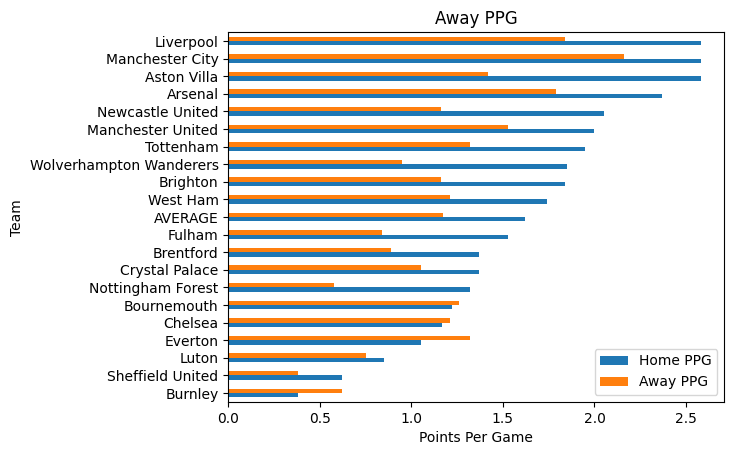

In [142]:
eng_ha.sort_values("Home PPG").plot(kind="barh")
plt.title("Away PPG")
plt.ylabel("Team")
plt.xlabel("Points Per Game")

Text(0.5, 0, 'Points Per Game net')

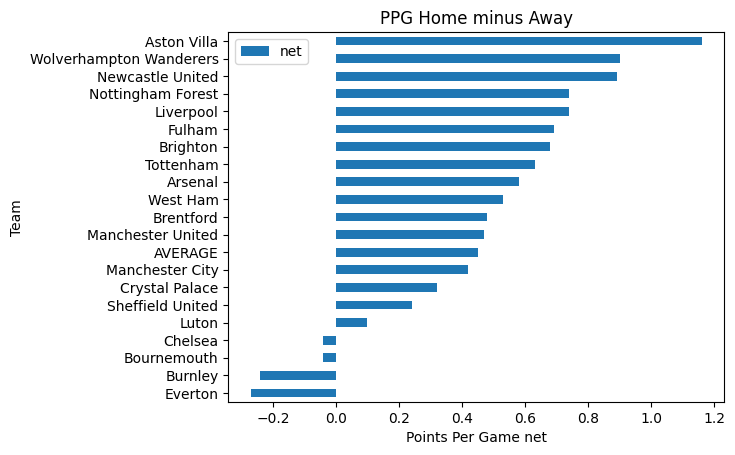

In [143]:
eng_net.sort_values("net").plot(kind="barh")
plt.title("PPG Home minus Away")
plt.ylabel("Team")
plt.xlabel("Points Per Game net")

<Axes: xlabel='Home PPG'>

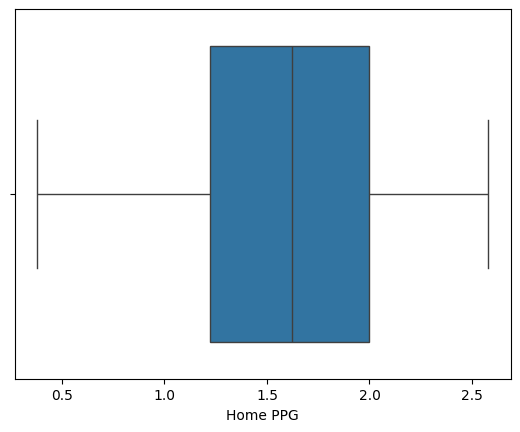

In [144]:
sns.boxplot(x='Home PPG', data=eng_ha)

Text(0.5, 0, 'Points Per Game')

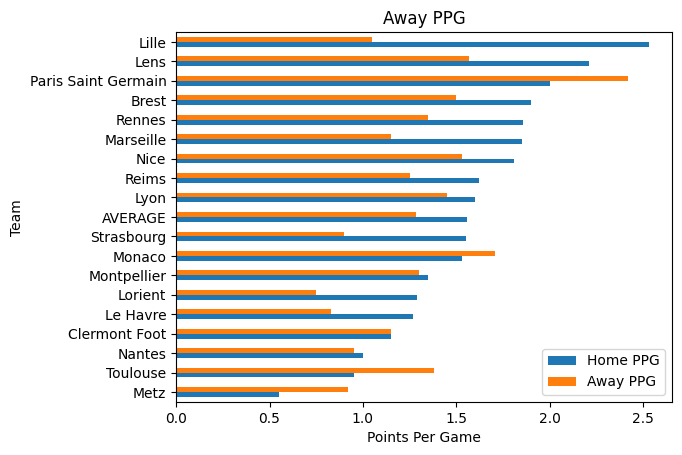

In [145]:
fra_ha.sort_values("Home PPG").plot(kind="barh")
plt.title("Away PPG")
plt.ylabel("Team")
plt.xlabel("Points Per Game")

Text(0.5, 0, 'Points Per Game net')

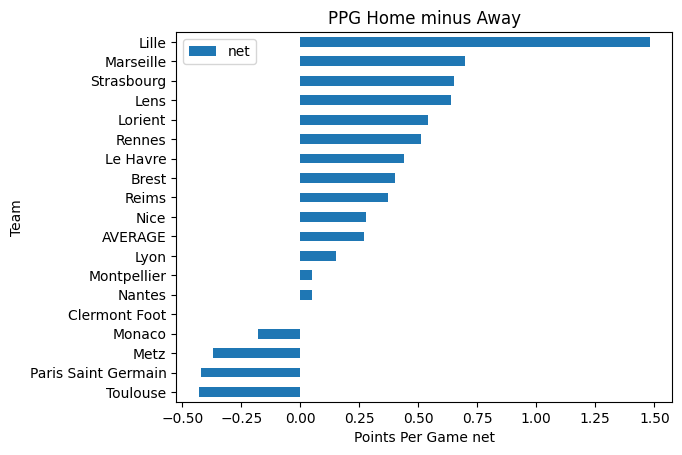

In [146]:
fra_net.sort_values("net").plot(kind="barh")
plt.title("PPG Home minus Away")
plt.ylabel("Team")
plt.xlabel("Points Per Game net")

Text(0.5, 0, 'Points Per Game')

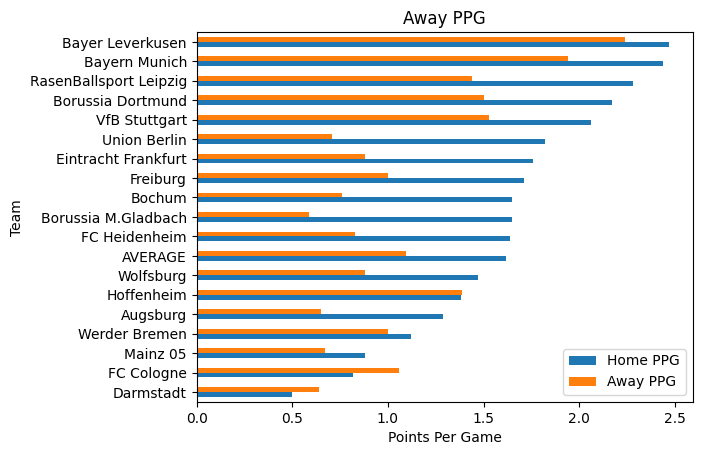

In [147]:
ger_ha.sort_values("Home PPG").plot(kind="barh")
plt.title("Away PPG")
plt.ylabel("Team")
plt.xlabel("Points Per Game")

Text(0.5, 0, 'Points Per Game net')

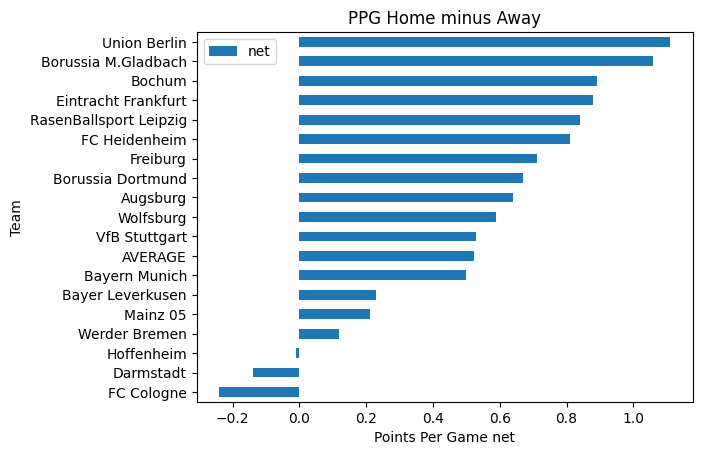

In [148]:
ger_net.sort_values("net").plot(kind="barh")
plt.title("PPG Home minus Away")
plt.ylabel("Team")
plt.xlabel("Points Per Game net")

Text(0.5, 0, 'Points Per Game')

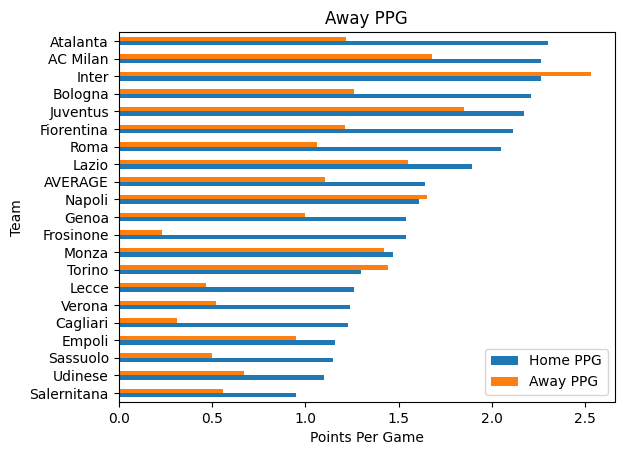

In [149]:
ita_ha.sort_values("Home PPG").plot(kind="barh")
plt.title("Away PPG")
plt.ylabel("Team")
plt.xlabel("Points Per Game")

Text(0.5, 0, 'Points Per Game net')

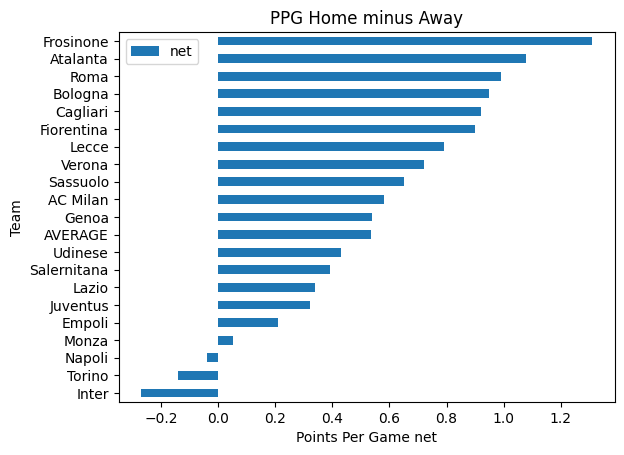

In [150]:
ita_net.sort_values("net").plot(kind="barh")
plt.title("PPG Home minus Away")
plt.ylabel("Team")
plt.xlabel("Points Per Game net")

Text(0.5, 0, 'Points Per Game')

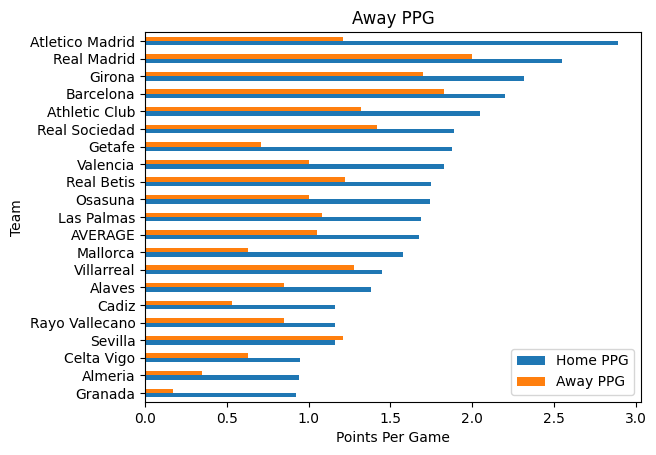

In [151]:
spa_ha.sort_values("Home PPG").plot(kind="barh")
plt.title("Away PPG")
plt.ylabel("Team")
plt.xlabel("Points Per Game")

Text(0.5, 0, 'Points Per Game net')

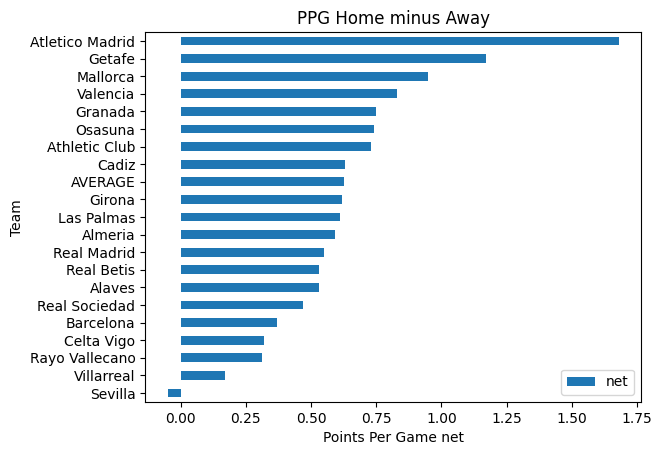

In [152]:
spa_net.sort_values("net").plot(kind="barh")
plt.title("PPG Home minus Away")
plt.ylabel("Team")
plt.xlabel("Points Per Game net")

In [153]:
ov_ha = [eng_ha, fra_ha, ger_ha, ita_ha, spa_ha]
ov_ha_df = pd.concat(ov_ha)
ov_net = [eng_net, fra_net, ger_net, ita_net, spa_net]
ov_net_df = pd.concat(ov_net)